In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
path='/mnt/data1/prabhakaran/WeatherBench/netcdf/hr/2m_temperature_1.40625deg/media/rasp/Elements/weather-benchmark/1.40625deg/2m_temperature/'
fname='2m_temperature_1979_1.40625deg.nc'
fname2018= "2m_temperature_2018_1.40625deg.nc"

In [9]:
ds_temp_hr = xr.open_dataset(path+fname)

In [10]:
ds_temp_hr

<xarray.Dataset>
Dimensions:  (lat: 128, lon: 256, time: 8760)
Coordinates:
  * lat      (lat) float64 -89.3 -87.89 -86.48 -85.08 ... 85.08 86.48 87.89 89.3
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * time     (time) datetime64[ns] 1979-01-01 ... 1979-12-31T23:00:00
Data variables:
    t2m      (time, lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-11-07 07:51:20 GMT by grib_to_netcdf-2.14.0: /opt/ecmw...

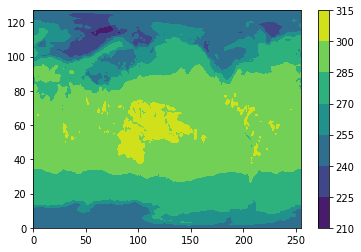

In [11]:
plt.contourf(ds_temp_hr['t2m'][0, :, :])
plt.colorbar()
plt.show()

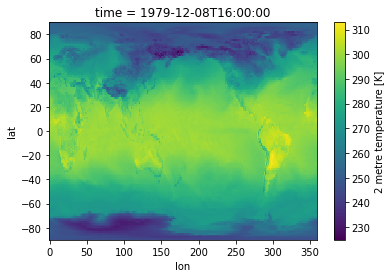

In [12]:
ds_temp_hr.t2m.isel(time=8200).plot()



In [ ]:
#ds_temp_hr.t2m['time.season']
# Winter temperature
winter_ds_temp = ds_temp_hr.t2m[ds_temp_hr.t2m.time.dt.season == 'DJF']

winter_ds_temp.isel(time=0).plot()

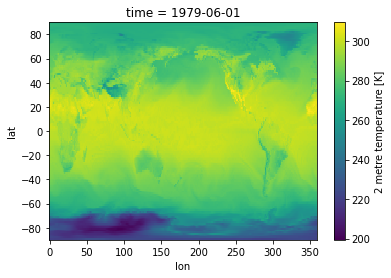

In [14]:
#ds_temp_hr.t2m['time.season']
# Summer temperature
Summer_ds_temp = ds_temp_hr.t2m[ds_temp_hr.t2m.time.dt.season == 'JJA']

Summer_ds_temp.isel(time=0).plot()

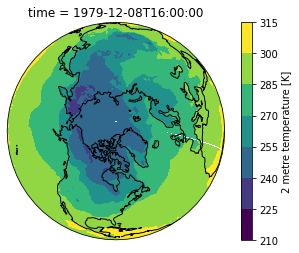

In [15]:
ax = plt.axes(projection=ccrs.Orthographic(-80, 85))
#ax = plt.axes(projection=ccrs.Orthographic(80, 0))
ax.set_global()
ds_temp_hr.t2m.isel(time=8200).plot.contourf(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines()

In [16]:
ds_temp_hr_2018= xr.open_dataset(path+fname2018)

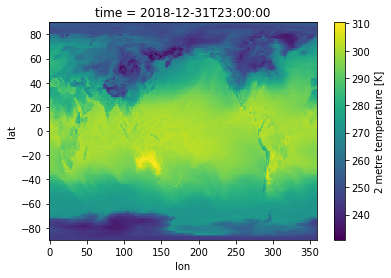

In [17]:
ds_temp_hr_2018.t2m.isel(time=-1).plot()

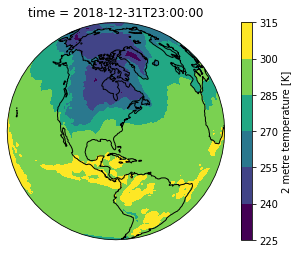

In [18]:
ax = plt.axes(projection=ccrs.Orthographic(-80, 35))
ax.set_global()
ds_temp_hr_2018.t2m.isel(time=-1).plot.contourf(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines()

(array([  202252.,  3609237.,  8670219., 14249079., 24923739., 33395532.,
        67301669., 83460817., 50563463.,   671673.]),
 array([194.68663, 207.68042, 220.67421, 233.668  , 246.66179, 259.65558,
        272.64938, 285.64316, 298.63696, 311.63074, 324.62454],
       dtype=float32),
 <BarContainer object of 10 artists>)

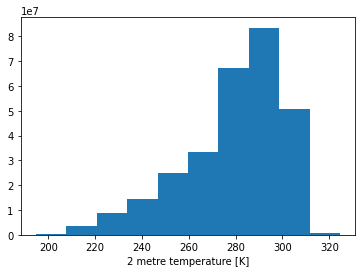

In [19]:
ds_temp_hr_2018.t2m.sel().plot()

In [20]:
path_lr ='/mnt/data1/prabhakaran/WeatherBench/netcdf/lr/2m_temperature/2m_temperature_5.625deg/'
file_lr='2m_temperature_1979_5.625deg.nc'

In [21]:
ds_temp_lr = xr.open_dataset(path_lr+file_lr)
ds_temp_lr

<xarray.Dataset>
Dimensions:  (lon: 64, lat: 32, time: 8760)
Coordinates:
  * lon      (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * lat      (lat) float64 -87.19 -81.56 -75.94 -70.31 ... 75.94 81.56 87.19
  * time     (time) datetime64[ns] 1979-01-01 ... 1979-12-31T23:00:00
Data variables:
    t2m      (time, lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-11-07 07:51:20 GMT by grib_to_netcdf-2.14.0: /opt/ecmw...

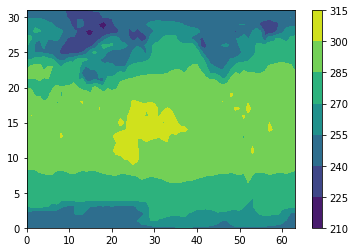

In [22]:
plt.contourf(ds_temp_lr['t2m'][0, :, :])
plt.colorbar()
plt.show()

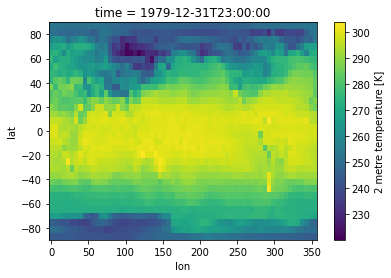

In [23]:
ds_temp_lr.t2m.isel(time=-1).plot()

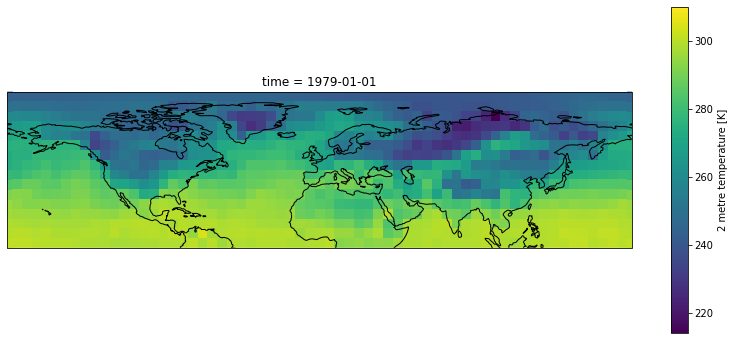

In [24]:
plt.figure(figsize=(14, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ds_temp_lr.t2m[0].plot.pcolormesh(
    ax=ax,x="lon", y="lat", transform=ccrs.PlateCarree(), add_colorbar=True
)
ax.coastlines()
ax.set_ylim([0, 90]);

In [25]:
path_cloud ='/mnt/data1/prabhakaran/WeatherBench/netcdf/lr/total_cloud_cover_5.625deg/'
file_cloud='total_cloud_cover_1979_5.625deg.nc'

In [26]:
ds_cloud_lr = xr.open_dataset(path_cloud+file_cloud)
ds_cloud_lr

<xarray.Dataset>
Dimensions:  (lon: 64, lat: 32, time: 8760)
Coordinates:
  * lon      (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * lat      (lat) float64 -87.19 -81.56 -75.94 -70.31 ... 75.94 81.56 87.19
  * time     (time) datetime64[ns] 1979-01-01 ... 1979-12-31T23:00:00
Data variables:
    tcc      (time, lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-01-01 13:38:30 GMT by grib_to_netcdf-2.15.0: /opt/ecmw...

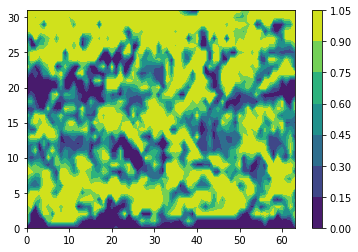

In [27]:
plt.contourf(ds_cloud_lr['tcc'][0, :, :])
plt.colorbar()
plt.show()

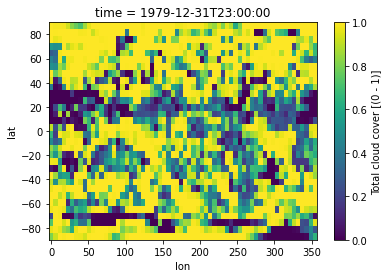

In [28]:
ds_cloud_lr.tcc.isel(time=-1).plot()

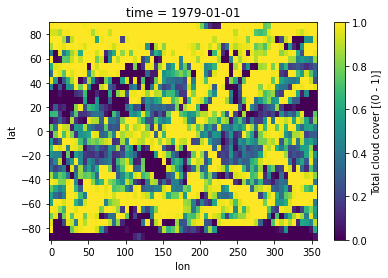

In [29]:
ds_cloud_lr.tcc[0].plot()

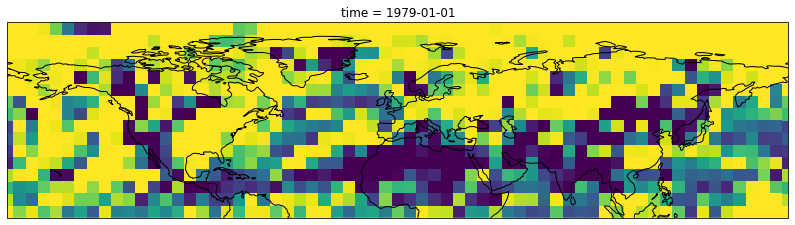

In [30]:
plt.figure(figsize=(14, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ds_cloud_lr.tcc[0].plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False
)
ax.coastlines()
ax.set_ylim([0, 90]);

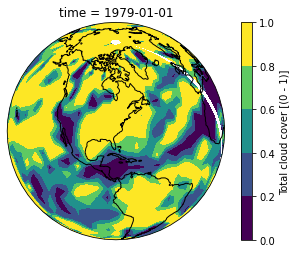

In [31]:
ax = plt.axes(projection=ccrs.Orthographic(-80, 35))
ax.set_global()
ds_cloud_lr.tcc[0].plot.contourf(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines()


In [31]:
path='/mnt/data1/prabhakaran/WeatherBench/netcdf/hr/2m_temperature_1.40625deg/media/rasp/Elements/weather-benchmark/1.40625deg/2m_temperature/'
fname='2m_temperature_1979_1.40625deg.nc'
fname2018= "2m_temperature_2018_1.40625deg.nc"

In [4]:
ds_temp_hr = xr.open_dataset(path+fname)

In [5]:
ds_temp_hr

<xarray.Dataset>
Dimensions:  (lat: 128, lon: 256, time: 8760)
Coordinates:
  * lat      (lat) float64 -89.3 -87.89 -86.48 -85.08 ... 85.08 86.48 87.89 89.3
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * time     (time) datetime64[ns] 1979-01-01 ... 1979-12-31T23:00:00
Data variables:
    t2m      (time, lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-11-07 07:51:20 GMT by grib_to_netcdf-2.14.0: /opt/ecmw...

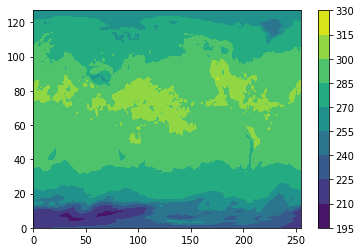

In [35]:
plt.contourf(ds_temp_hr['t2m'][0, :, :])
plt.colorbar()
plt.show()

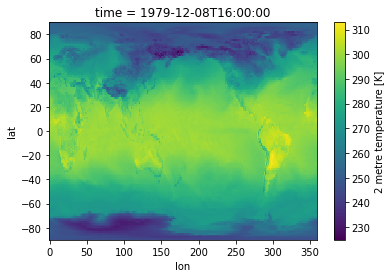

In [60]:
ds_temp_hr.t2m.isel(time=8200).plot()



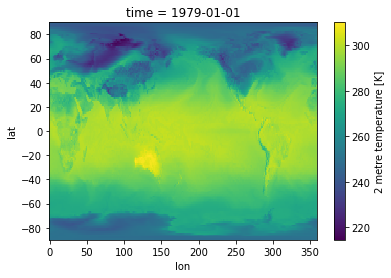

In [67]:
#ds_temp_hr.t2m['time.season']
# Winter temperature
winter_ds_temp = ds_temp_hr.t2m[ds_temp_hr.t2m.time.dt.season == 'DJF']

winter_ds_temp.isel(time=0).plot()

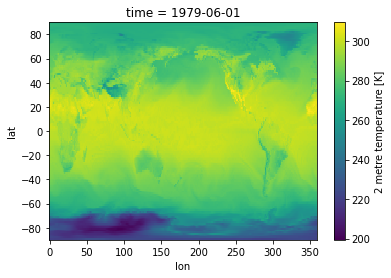

In [68]:
#ds_temp_hr.t2m['time.season']
# Summer temperature
Summer_ds_temp = ds_temp_hr.t2m[ds_temp_hr.t2m.time.dt.season == 'JJA']

Summer_ds_temp.isel(time=0).plot()

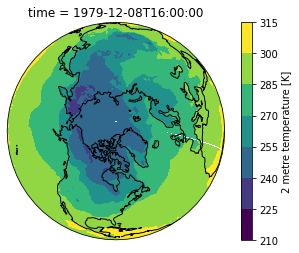

In [81]:
ax = plt.axes(projection=ccrs.Orthographic(-80, 85))
#ax = plt.axes(projection=ccrs.Orthographic(80, 0))
ax.set_global()
ds_temp_hr.t2m.isel(time=8200).plot.contourf(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines()

In [9]:
ds_temp_hr_2018= xr.open_dataset(path+fname2018)

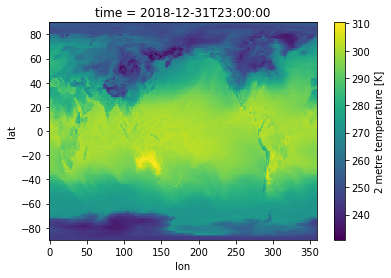

In [10]:
ds_temp_hr_2018.t2m.isel(time=-1).plot()

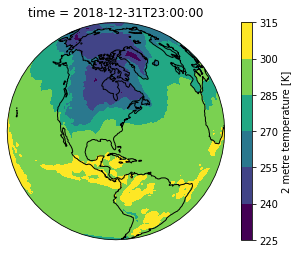

In [11]:
ax = plt.axes(projection=ccrs.Orthographic(-80, 35))
ax.set_global()
ds_temp_hr_2018.t2m.isel(time=-1).plot.contourf(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines()

(array([  202252.,  3609237.,  8670219., 14249079., 24923739., 33395532.,
        67301669., 83460817., 50563463.,   671673.]),
 array([194.68663, 207.68042, 220.67421, 233.668  , 246.66179, 259.65558,
        272.64938, 285.64316, 298.63696, 311.63074, 324.62454],
       dtype=float32),
 <BarContainer object of 10 artists>)

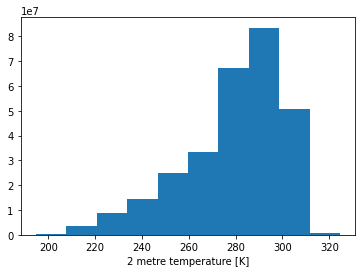

In [12]:
ds_temp_hr_2018.t2m.sel().plot() 

In [13]:
path_lr ='/mnt/data1/prabhakaran/WeatherBench/netcdf/lr/2m_temperature/2m_temperature_5.625deg/'
file_lr='2m_temperature_1979_5.625deg.nc'

In [14]:
ds_temp_lr = xr.open_dataset(path_lr+file_lr)
ds_temp_lr

<xarray.Dataset>
Dimensions:  (lon: 64, lat: 32, time: 8760)
Coordinates:
  * lon      (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * lat      (lat) float64 -87.19 -81.56 -75.94 -70.31 ... 75.94 81.56 87.19
  * time     (time) datetime64[ns] 1979-01-01 ... 1979-12-31T23:00:00
Data variables:
    t2m      (time, lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-11-07 07:51:20 GMT by grib_to_netcdf-2.14.0: /opt/ecmw...

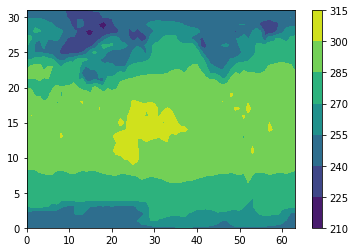

In [15]:
plt.contourf(ds_temp_lr['t2m'][0, :, :])
plt.colorbar()
plt.show()

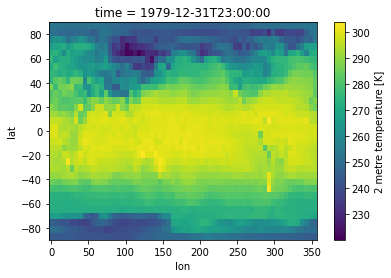

In [16]:
ds_temp_lr.t2m.isel(time=-1).plot()

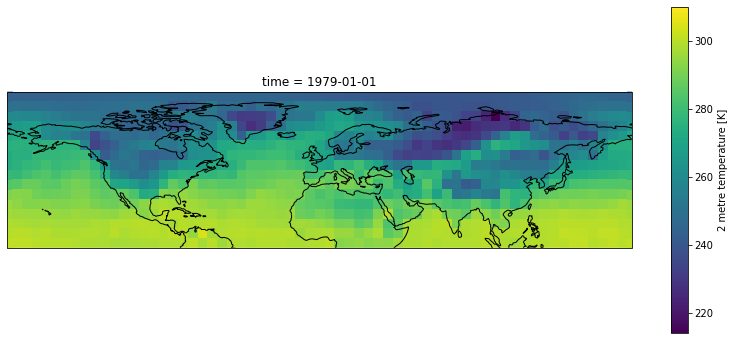

In [17]:
plt.figure(figsize=(14, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ds_temp_lr.t2m[0].plot.pcolormesh(
    ax=ax,x="lon", y="lat", transform=ccrs.PlateCarree(), add_colorbar=True
)
ax.coastlines()
ax.set_ylim([0, 90]);

In [18]:
path_cloud ='/mnt/data1/prabhakaran/WeatherBench/netcdf/lr/total_cloud_cover_5.625deg/'
file_cloud='total_cloud_cover_1979_5.625deg.nc'

In [19]:
ds_cloud_lr = xr.open_dataset(path_cloud+file_cloud)
ds_cloud_lr

<xarray.Dataset>
Dimensions:  (lon: 64, lat: 32, time: 8760)
Coordinates:
  * lon      (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * lat      (lat) float64 -87.19 -81.56 -75.94 -70.31 ... 75.94 81.56 87.19
  * time     (time) datetime64[ns] 1979-01-01 ... 1979-12-31T23:00:00
Data variables:
    tcc      (time, lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-01-01 13:38:30 GMT by grib_to_netcdf-2.15.0: /opt/ecmw...

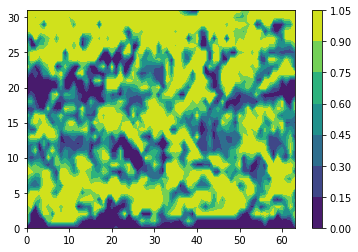

In [20]:
plt.contourf(ds_cloud_lr['tcc'][0, :, :])
plt.colorbar()
plt.show()

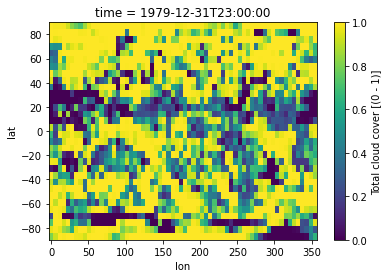

In [21]:
ds_cloud_lr.tcc.isel(time=-1).plot()

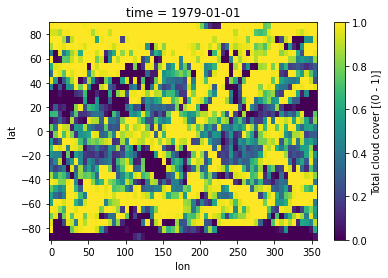

In [22]:
ds_cloud_lr.tcc[0].plot()

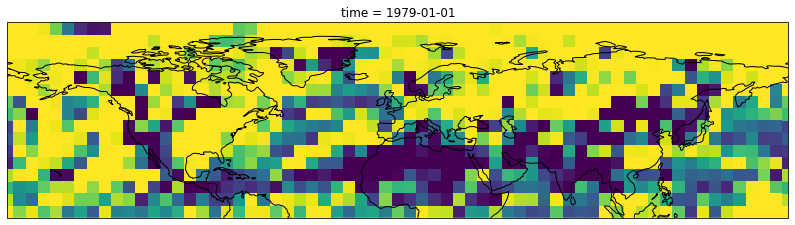

In [23]:
plt.figure(figsize=(14, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ds_cloud_lr.tcc[0].plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False
)
ax.coastlines()
ax.set_ylim([0, 90]);

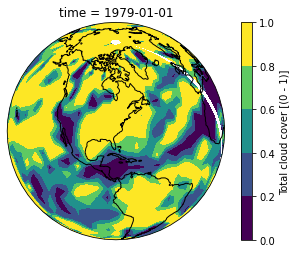

In [24]:
ax = plt.axes(projection=ccrs.Orthographic(-80, 35))
ax.set_global()
ds_cloud_lr.tcc[0].plot.contourf(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines()
